In [355]:
import pandas as pd
import numpy as np

In [356]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

In [357]:
import spacy
import string
from nltk.corpus import stopwords
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer


nlp=spacy.load('fr_core_news_sm')

In [358]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [359]:
df = pd.read_csv("dataset.csv", sep='\t', header=0, index_col=None)

In [360]:
df.head()

,text,label
0,Salut !\n\nAlors effectivement c’est un pavé m...,ados
1,Bonjour\nJe ne suis pas maman solo mais qui su...,adult
2,"Ho mon dieu il met des "" ^^ "" D: Je te souhait...",ados
3,"Ouais, je comprends...",ados
4,Folle de toi...,ados


In [361]:
df.label.unique()

array(['ados', 'adult'], dtype=object)

In [362]:
df['label'] = df['label'].replace(["ados","adult"],[0,1])

C:\Users\Zouhaoui\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


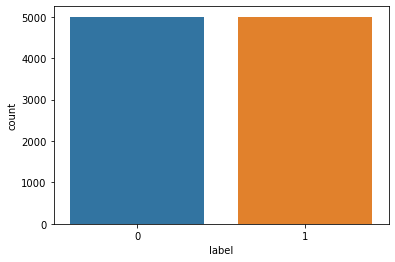

In [363]:
import seaborn as sns
sns.countplot(df['label']);

In [364]:
def clean_text(text):
    text = text.lower()
    #retirer le saut de ligne
    text = text.replace('\n',' ')
    text = text.replace("'",' ')
    new_text = ''
    #retirer la ponctuation
    for char in text:
        if char in string.punctuation or char.isdigit():
            new_text+= ' '
        else:
            new_text+= char

    #FORME CANONIQUE
    tokens = []
    tokens_texte = nlp(new_text)
    for token in tokens_texte:
        tokens.append(token.lemma_)
    new_text = " ".join(tokens)
    clean_text = []
    # retirer les stops words
    for word in new_text.split(' '):
        if word not in stopwords.words('french')and word not in list(fr_stop)  and word != '' and len(word)>2:
            clean_text.append(word)
    clean_text = " ".join(clean_text)
    return "".join(clean_text)

In [365]:
df['text'] = df['text'].apply(lambda x: clean_text(x))

In [366]:
df

,text,label
0,salut effectivement pavé avai besoin confier t...,0
1,bonjour maman solo juger inquiette fille voir ...,1
2,dieu mettre souhaite brûler enfer hérétique ou...,0
3,ouer comprend,0
4,fou,0
...,...,...
9995,bonjour proposer jeu perdre retirer vetement f...,0
9996,plein questionnement moment cherche échanger m...,1
9997,trouver extrait resumer clairement bon enfant ...,1
9998,réponse breizhtristan non savoir mal faire kar...,0


In [367]:
tfidfvectorizer = TfidfVectorizer(max_df=0.9, max_features=200000, min_df=0.1)

In [368]:
with open('tok.data', 'wb') as data:
    pickle.dump(tfidfvectorizer, data, -1)

In [369]:
X = tfidfvectorizer.fit_transform(df['text']).toarray()

In [370]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [371]:
 y = df['label']

In [372]:
y

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    1
9997    1
9998    0
9999    1
Name: label, Length: 10000, dtype: int64

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [374]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [375]:
with open('LR.data', 'wb') as data:
    pickle.dump(LR, data, -1)

In [376]:
y_pred = LR.predict(X_test)

In [377]:
confusion_matrix(y_test, y_pred)

array([[914, 100],
       [184, 802]], dtype=int64)

In [378]:
model1_evaluation = classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1014
           1       0.89      0.81      0.85       986

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000



In [379]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(max_depth = 10,n_estimators = 75, criterion = 'entropy')
clf.fit(X_train, y_train)




RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=75)

In [380]:
y_pred = clf.predict(X_test)

In [381]:
with open('RF.data', 'wb') as data:
    pickle.dump(clf, data)

In [382]:
confusion_matrix(y_test, y_pred)

array([[910, 104],
       [364, 622]], dtype=int64)

In [383]:
from sklearn.metrics import classification_report
modelRF_evaluation=classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.71      0.90      0.80      1014
           1       0.86      0.63      0.73       986

    accuracy                           0.77      2000
   macro avg       0.79      0.76      0.76      2000
weighted avg       0.78      0.77      0.76      2000

